# Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline 

### The Breast Cancer Dataset from sklearn:
**The Breast Cancer Wisconsin dataset is one of the datasets available in the sklearn library. 
<br>It's a binary classification dataset where the task is to predict whether a tumor is malignant or benign.**

## Data splitting

### Loading the dataset

In [2]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
print(X.shape)
print(y.shape)

np.unique(y)

(569, 30)
(569,)


array([0, 1])

<b> Getting the value counts

In [3]:
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

## Switching Labels

In [9]:
y.value_counts()

target
0    357
1    212
Name: count, dtype: int64

In [10]:
y = y.apply(lambda x: 1 if x==0 else 0)

In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

# Logistic regresion

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix



log_model = LogisticRegression() # weights to be added if we want to avoid fall negative or fall positive

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

pt = PowerTransformer()
pt.fit(X_train)
X_train_log = pt.transform(X_train)
X_test_log = pt.transform(X_test)

#where the magic happens

log_model.fit(X_train_log, y_train)

y_pred_train_log = log_model.predict(X_train_log)
y_pred_test_log = log_model.predict(X_test_log)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)



,Error_metric,Train,Test
0,Accuracy,0.986813,0.973684
1,Precision,0.982456,0.986667
2,Recall,0.996441,0.973684


## Let's take a look at the confusion matrix!

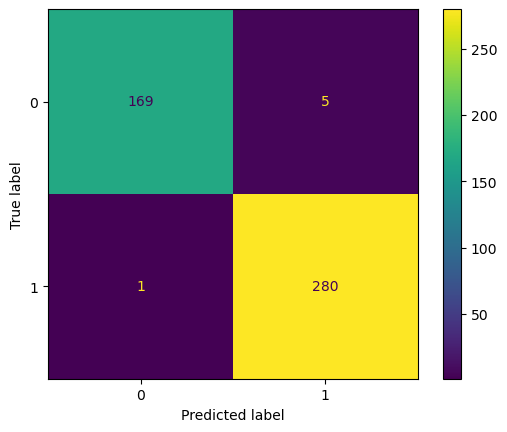

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, y_pred_train_log, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

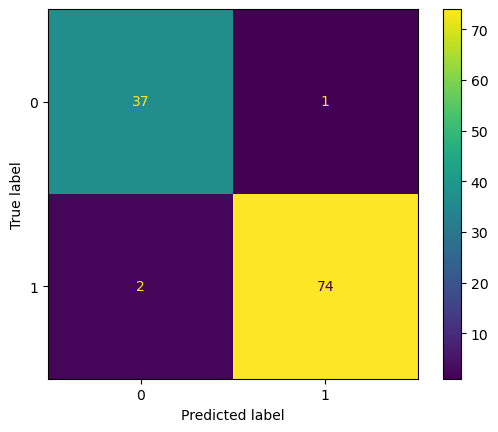

In [14]:
cm_test = confusion_matrix(y_test, y_pred_test_log, labels = log_model.classes_)
disp_test = ConfusionMatrixDisplay(cm_test)
disp_test.plot()

In [17]:
sample = pd.DataFrame(X_test_log).sample()

In [18]:
sample

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
89,-1.122313,0.01643,-1.029666,-1.100587,0.055025,0.405594,-0.127689,-0.545748,0.502606,0.463773,...,-1.04676,-0.388508,-0.970528,-1.070611,-0.478092,0.216936,-0.268513,-0.510653,0.229591,-0.378777


In [16]:
log_model.predict_proba(sample)

array([[2.70425894e-04, 9.99729574e-01]])